In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the Excel file
excel_file = pd.ExcelFile("penalty_dataset.xlsx")

# parse the desired sheet
df = excel_file.parse("penalty_dataset")

# save it as a CSV
df.to_csv("penalty_dataset.csv", index=False)

df = pd.read_csv("penalty_dataset.csv")

# display the first few rows and column names
df.head(), df.columns

(  gender               season_name  competition_id            competition  \
 0    men  2000 Netherlands/Belgium              18  European Championship   
 1    men  2000 Netherlands/Belgium              18  European Championship   
 2    men  2000 Netherlands/Belgium              18  European Championship   
 3    men  2000 Netherlands/Belgium              18  European Championship   
 4    men  2000 Netherlands/Belgium              18  European Championship   
 
          stage  match_date  match_id  event_id  home_team_id       home_team  \
 0  Group Stage  2000-06-11       631      5031           785     Netherlands   
 1  Group Stage  2000-06-11      9201     12919           713          Turkey   
 2  Group Stage  2000-06-16      5562      1162           272  Czech Republic   
 3  Group Stage  2000-06-20      9772      8763           169         England   
 4  Group Stage  2000-06-20      9772     10668           169         England   
 
    ...       away_team home_score  away_s

## Who has scored the 5th most penalties since the start of 2015 (excluding penalty shootouts)? And how many have they scored?

In [3]:
# convert match_date to datetime
df['match_date'] = pd.to_datetime(df['match_date'], errors='coerce')

# filter data: since start of 2015 and exclude penalty shootouts
filtered_df = df[
    (df['match_date'] >= '2015-01-01') &
    (df['event_type'] == 'Penalty Goal') &
    (df['shootout_order'].isna())
]

# count penalty goals per player
penalty_counts = filtered_df['player'].value_counts().reset_index()
penalty_counts.columns = ['player', 'penalty_goals']

# get the 5th highest scorer
fifth_scorer = penalty_counts.iloc[4]  # 0-indexed

fifth_scorer

,4
player,Harry Kane
penalty_goals,39


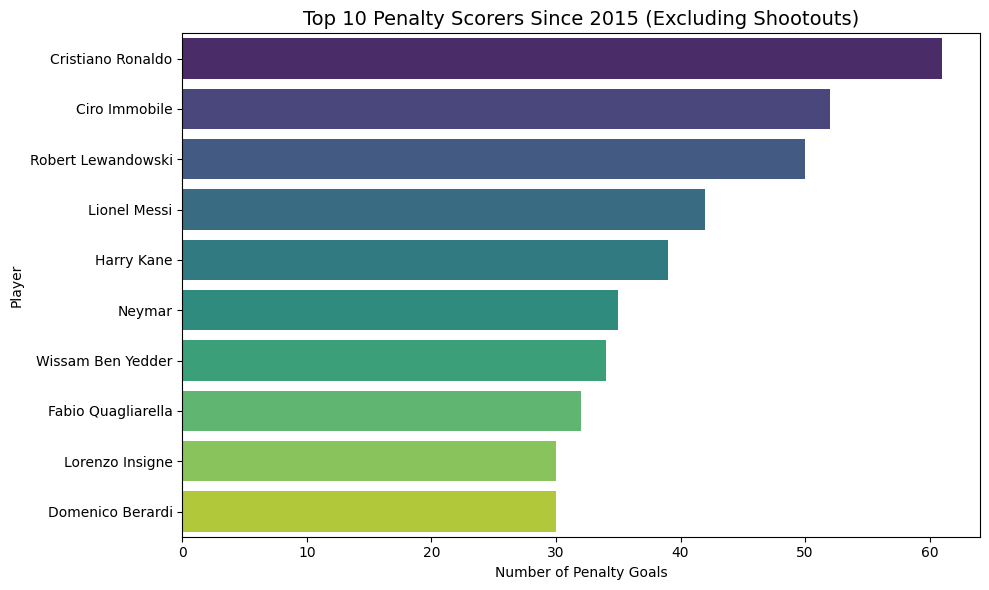

In [4]:
# select top 10 penalty scorers
top_scorers = penalty_counts.head(10)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_scorers, x='penalty_goals', y='player', hue='player', palette='viridis', legend=False)
plt.title('Top 10 Penalty Scorers Since 2015 (Excluding Shootouts)', fontsize=14)
plt.xlabel('Number of Penalty Goals')
plt.ylabel('Player')
plt.tight_layout()
plt.show()

## What 10 minute window had the most penalties awarded within it and how many penalties were awarded?

In [5]:
# convert 'time' to numeric (some might be strings like '90+2')
def parse_minute(val):
    try:
        return int(str(val).split('+')[0])
    except:
        return None

filtered_df = filtered_df.copy()

# Convert 'time' to numeric
filtered_df['minute'] = filtered_df['time'].apply(parse_minute)

# Create 10-minute windows
filtered_df['minute_bin'] = (filtered_df['minute'] // 10) * 10

# count penalties
window_counts = filtered_df['minute_bin'].value_counts().reset_index()
window_counts.columns = ['start_minute', 'penalty_count']
window_counts = window_counts.sort_values(by='penalty_count', ascending=False)

# get the most common 10-minute window
top_window = window_counts.iloc[0]

start = top_window['start_minute']
end = start + 9
count = top_window['penalty_count']

print(f"The 10-minute window with the most penalties is {start}-{end} minutes with {count} penalties.")

The 10-minute window with the most penalties is 50-59 minutes with 760 penalties.


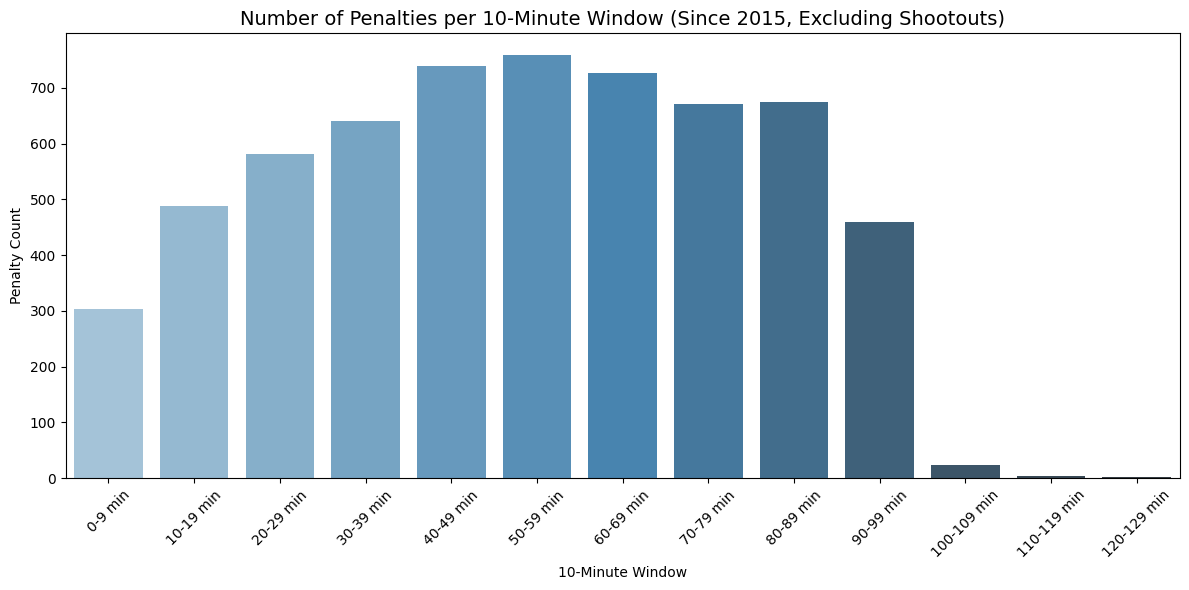

In [6]:
# create a label for each 10-minute window
window_counts['window_label'] = window_counts['start_minute'].astype(str) + '-' + (window_counts['start_minute'] + 9).astype(str) + ' min'

# sort by minute for a cleaner plot (not by count)
window_counts_sorted = window_counts.sort_values(by='start_minute')

# plot
plt.figure(figsize=(12, 6))
sns.barplot(data=window_counts_sorted, x='window_label', y='penalty_count', hue='window_label', palette='Blues_d', legend=False)
plt.xticks(rotation=45)
plt.title('Number of Penalties per 10-Minute Window (Since 2015, Excluding Shootouts)', fontsize=14)
plt.xlabel('10-Minute Window')
plt.ylabel('Penalty Count')
plt.tight_layout()
plt.show()